# Brownian motion
The term “classical Brownian motion” describes the random movement of microscopic particles suspended in a liquid or gas. According to the theory, the temperature of a substance is proportional to the average kinetic energy with which the molecules of the substance are moving or vibrating. 

Generate an instance of Brownian motion (i.e. the Wiener process):

$$
X_{(t+1)} = X_{(t)} + N(0, delta^2 * t; 0, t)
$$

where N(a,b; t0, t1) is a normally distributed random variable with mean a and variance b.  The parameters t0 and t1 make explicit the statistical independence of N on different time intervals; that is, if [t0, t1] and [t2, t3] are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3) are independent.
    
Written as an iteration scheme,

$$
X_{(t + 1)} = X_{(t)} + N(0, delta^2 * t; dt, t+1)
$$
Brownian motion could be interpreted as random walk in time series, where moving of the series is random but has some memory of previous step.

The Wiener process: $W_{t}$ is characterised by the following properties:

$W_{0}=0$
W has independent increments: for every $t>0$ the future increments $W_{t+u}-W_{t}$ are independent of the past values $W_s, s<t$.

W has Gaussian increments: $W_{t+u}-W_{t}$ is normally distributed with mean 0 and variance u, $W_{t+u}-W_{t}$ belogns to ${Gaussian} (0,u)$

W has continuous paths: $W_{t}$ is continuous in t.


In [149]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [150]:
def brownian_motion(num_steps, initial_value):
    x = [0]*num_steps
    x[0]=initial_value
    for i in range(num_steps-1):
        x[i+1]=x[i]+ np.random.randn()
    return x

In [151]:
def brownian_motion_optimised(num_steps, initial_value):
    x = np.zeros(num_steps)
    for i in range(num_steps-1):
        x[i+1]=x[i]+ np.cumsum(np.random.randn())/math.sqrt(num_steps)
    return x

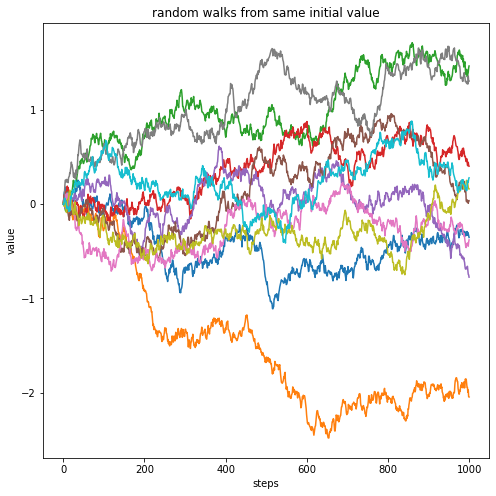

In [152]:
random_walks = 10
random.seed(123)
plt.figure(figsize=(8,8))
plt.xlabel('steps')
plt.ylabel('value')
plt.title('random walks from same initial value')
for walk in range(random_walks):
    x = brownian_motion_optimised(1000, 0)
    plt.plot(x);

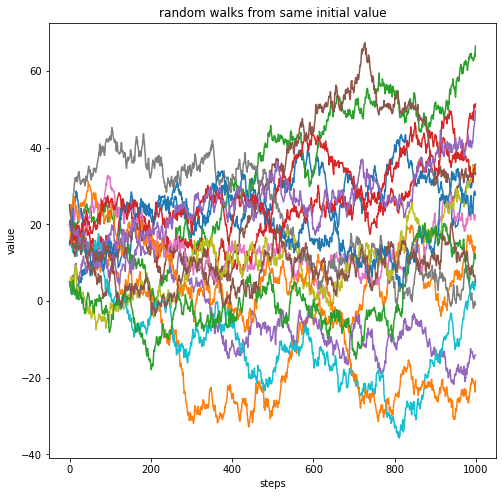

In [153]:
random_walks = 4

plt.figure(figsize=(8,8))
plt.xlabel('steps')
plt.ylabel('value')
plt.title('random walks from same initial value')
for walk in range(random_walks):
    for initial in [5,15,20,25]:
        x = brownian_motion(1000, initial)
        plt.plot(x);

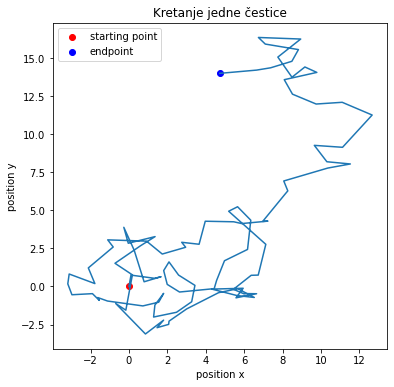

In [161]:
x = brownian_motion(100, 0)
y = brownian_motion(100, 0)
plt.figure(figsize=(6,6))
plt.scatter(x[0], y[0], label='starting point', color='red')
plt.scatter(x[99], y[99], label='endpoint', color='blue')
plt.legend()
plt.xlabel('position x')
plt.ylabel('position y')
plt.title('Kretanje jedne čestice')
plt.plot(x,y);

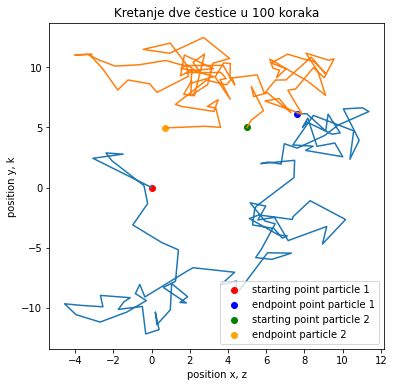

In [162]:
x = brownian_motion(100, 0)
y = brownian_motion(100, 0)
z = brownian_motion(100, 5)
k = brownian_motion(100, 5)
plt.figure(figsize=(6,6))
plt.scatter(x[0], y[0], label='starting point particle 1', color='red')
plt.scatter(x[99], y[99], label='endpoint point particle 1', color='blue')
plt.scatter(z[0], k[0], label='starting point particle 2', color='green')
plt.scatter(z[99], k[99], label='endpoint particle 2', color='orange')
plt.legend()
plt.xlabel('position x, z')
plt.ylabel('position y, k')
plt.title('Kretanje dve čestice u 100 koraka')
plt.plot(x,y)
plt.plot(z,k);

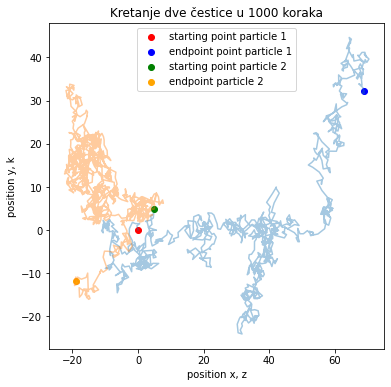

In [169]:
x = brownian_motion(1000, 0)
y = brownian_motion(1000, 0)
z = brownian_motion(1000, 5)
k = brownian_motion(1000, 5)
plt.figure(figsize=(6,6))
plt.scatter(x[0], y[0], label='starting point particle 1', color='red')
plt.scatter(x[999], y[999], label='endpoint point particle 1', color='blue')
plt.scatter(z[0], k[0], label='starting point particle 2', color='green')
plt.scatter(z[999], k[999], label='endpoint particle 2', color='orange')
plt.legend()
plt.xlabel('position x, z')
plt.ylabel('position y, k')
plt.title('Kretanje dve čestice u 1000 koraka')
plt.plot(x,y, alpha = 0.4)
plt.plot(z,k, alpha = 0.4);